### 产生训练样本

In [20]:
import numpy as np
np.random.seed(0)

def myfun(x):
    '''目标函数
    input:x(float):自变量
    output:函数值'''
    return np.sin(x)

x = np.linspace(0,15, 150)
y = myfun(x) + 1 + np.random.random(size=len(x)) * 0.3 - 0.15

input_len = 10

train_x = []
train_y = []
for i in range(len(y)-input_len):
    train_data = []
    for j in range(input_len):
        train_data.append([y[i+j]])
    train_x.append(train_data)
    train_y.append((y[i+input_len]))

### TensorFlow2框架下基于SimpleRNN实现序列回归示例

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 100)               10200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
14/14 [==============================] - 2s 19ms/step - loss: 0.5529
Epoch 2/10
14/14 [==============================] - 0s 16ms/step - loss: 0.0615
Epoch 3/10
14/14 [==============================] - 0s 15ms/step - loss: 0.0260
Epoch 4/10
14/14 [==============================] - 0s 16ms/step - loss: 0.0151
Epoch 5/10
14/14 [==============================] - 0s 20ms/

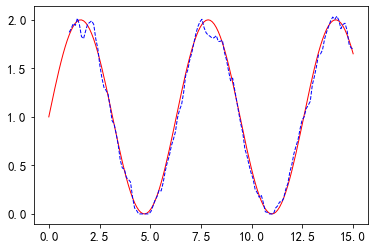

In [21]:
import tensorflow as tf
import tensorflow.keras as keras

model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(100, return_sequences=False, 
                    activation='relu',
                    input_shape=(input_len, 1)))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation("relu"))
model.compile(loss= 'mean_squared_error', optimizer='adam')
model.summary()
model.fit(train_x, train_y, epochs=10, batch_size=10, verbose=1)

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=13)
#plt.scatter(x, y, color="black", linewidth=1)
y0 = myfun(x) + 1
plt.plot(x, y0, color="red", linewidth=1)
y1 = model.predict(train_x)
plt.plot(x[input_len:], y1, "b--", linewidth=1)
plt.show()

### TensorFlow2框架下基于SimpleRNN实现向量预测

In [22]:
train_x = []
train_y = []
for i in range(len(y)-input_len-1):
    train_data = []
    for j in range(input_len):
        train_data.append([y[i+j]])
    train_x.append(train_data)
    y_data = []
    y_data.append(y[i+input_len])
    y_data.append(y[i+input_len+1])
    train_y.append(y_data) # y是一个二维向量

model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(100, return_sequences=False, 
                    activation='relu',
                    input_shape=(input_len, 1)))
model.add(tf.keras.layers.Dense(2))
model.add(tf.keras.layers.Activation("relu"))
model.compile(loss= 'mean_squared_error', optimizer='adam')
model.summary()
model.fit(train_x, train_y, epochs=10, batch_size=10, verbose=1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_8 (SimpleRNN)     (None, 100)               10200     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 202       
_________________________________________________________________
activation_6 (Activation)    (None, 2)                 0         
Total params: 10,402
Trainable params: 10,402
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
14/14 [==============================] - 2s 15ms/step - loss: 1.7259
Epoch 2/10
14/14 [==============================] - 0s 13ms/step - loss: 1.6826
Epoch 3/10
14/14 [==============================] - 0s 16ms/step - loss: 1.0440
Epoch 4/10
14/14 [==============================] - 0s 12ms/step - loss: 0.9077
Epoch 5/10
14/14 [==============================] - 0s 14ms/

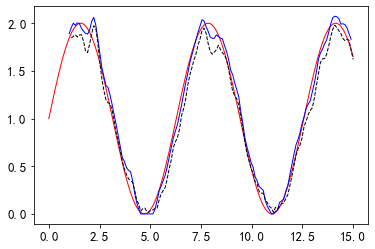

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=13)
#plt.scatter(x, y, color="black", linewidth=1)
y0 = myfun(x) + 1
plt.plot(x, y0, color="red", linewidth=1)
y1 = model.predict(train_x) # 预测输出也是一个二维向量
plt.plot(x[input_len:150-1], y1[:, 0], "b-", linewidth=1) # 蓝线是序列后第1个值的预测
plt.plot(x[input_len+1:], y1[:, 1], "k--", linewidth=1) # 黑线是序列后第2个值的预测
plt.show()

### TensorFlow2框架下深度循环神经网络实现

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(100, activation='relu',
                                    return_sequences=True,
                                    input_shape=(input_len, 1)))
model.add(tf.keras.layers.SimpleRNN(100, return_sequences=False, 
                                    activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation("relu"))
model.compile(loss= 'mean_squared_error', optimizer='adam')
model.summary()
model.fit(train_x, train_y, epochs=10, batch_size=10, verbose=1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_9 (SimpleRNN)     (None, 10, 100)           10200     
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_7 (Activation)    (None, 1)                 0         
Total params: 30,401
Trainable params: 30,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
14/14 [==============================] - 4s 37ms/step - loss: 0.4389
Epoch 2/10
14/14 [==============================] - 0s 28ms/step - loss: 0.0341
Epoch 3/10
14/14 [==============================] - 1s 48ms/step - loss: 0.0147
Epoch 4/

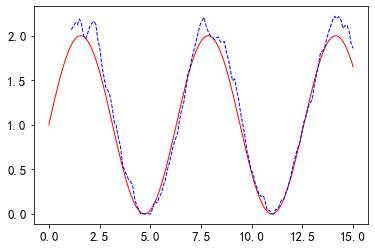

In [28]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=13)
#plt.scatter(x, y, color="black", linewidth=1)
y0 = myfun(x) + 1
plt.plot(x, y0, color="red", linewidth=1)
y1 = model.predict(train_x)
plt.plot(x[input_len+1:], y1, "b--", linewidth=1)
plt.show()